## Import

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox
import json
import ast
import datetime

sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

In [93]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(len(train))
print(len(test))

3000
4398


In [94]:
data = pd.concat([train, test])
data = data[train.columns]

## Data Info

In [95]:
data.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0


In [96]:
data.isnull().sum()

id                          0
belongs_to_collection    5917
budget                      0
genres                     23
homepage                 5032
imdb_id                     0
original_language           0
original_title              0
overview                   22
popularity                  0
poster_path                 2
production_companies      414
production_countries      157
release_date                1
runtime                     6
spoken_languages           62
status                      2
tagline                  1460
title                       3
Keywords                  669
cast                       26
crew                       38
revenue                  4398
dtype: int64

In [97]:
data.describe()

,id,budget,popularity,runtime,revenue
count,7398.000000,7.398000e+03,7398.000000,7392.000000,3.000000e+03
mean,3699.500000,2.260146e+07,8.514968,107.717262,6.672585e+07
std,2135.762978,3.694867e+07,12.165794,21.480040,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,1850.250000,0.000000e+00,3.933124,94.000000,2.379808e+06
50%,3699.500000,7.500000e+06,7.435844,104.000000,1.680707e+07
75%,5548.750000,2.800000e+07,10.920002,118.000000,6.891920e+07
max,7398.000000,3.800000e+08,547.488298,338.000000,1.519558e+09


## Missing

### Belongs Collection

In [98]:
data['belongs_to_collection'] = data['belongs_to_collection'].apply(lambda x: 0 if pd.isnull(x) else 1)

### Homepage

In [99]:
data['homepage'] = data['homepage'].apply(lambda x: 0 if pd.isnull(x) else 1)

### Status

In [100]:
data['status'] = data['status'].fillna('Released')

### Runtime

In [101]:
data['runtime'] = data['runtime'].fillna(data['runtime'].median())

### Release Date

In [102]:
data['release_date'] = data['release_date'].fillna(data['release_date'].mode()[0])

### Genres(Number of)

In [103]:
data['genres'] = data['genres'].apply(lambda x: {} if pd.isna(x) else str(x).replace("'", '"')).apply(lambda x: str(x).replace("[", '')).apply(lambda x: str(x).replace("]", ''))

In [104]:
data['genres'] = data['genres'].apply(lambda x: len(eval(x)))

### Keywords

In [105]:
data['Keywords'] = data['Keywords'].apply(lambda x: 0 if pd.isna(x) else len(ast.literal_eval(x)))

### Companies

In [106]:
data['production_companies'] = data['production_companies'].apply(lambda x: 0 if pd.isna(x) else len(ast.literal_eval(x)))

### Countries

In [107]:
data['production_countries'] = data['production_countries'].apply(lambda x: 0 if pd.isna(x) else len(ast.literal_eval(x)))

### Spoken Languages

In [108]:
data['spoken_languages'] = data['spoken_languages'].apply(lambda x: 0 if pd.isna(x) else len(ast.literal_eval(x)))

### Crew

In [109]:
data['crew'] = data['crew'].apply(lambda x: 0 if pd.isna(x) else len(ast.literal_eval(x)))

### Cast

In [110]:
data['cast'] = data['cast'].apply(lambda x: 0 if pd.isna(x) else len(ast.literal_eval(x)))

### Year, Month, WeekDay

In [111]:
data['release_date']=pd.to_datetime(data['release_date'], errors='coerce')

In [112]:
dates = []
for i in data['release_date']:
    if i.year>2017:
        digits = str(i.year)[2:4]
        date = str(i.day)+'-'+str(i.month)+'-19'+digits
        dates.append(date)
    else:
        dates.append(i)

In [113]:
data['release_date'] = dates
data['release_date']=pd.to_datetime(data['release_date'], errors='coerce')

In [114]:
data['week_day'] = data['release_date'].apply(lambda x: x.weekday())
data['year'] = data['release_date'].dt.year
data['month'] = data['release_date'].dt.month
del data['release_date']

In [115]:
data['week_day'] = data['week_day'].astype(str)
data['month'] = data['month'].astype(str)

In [116]:
bins = [1900, 1910, 1930, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
data['year'] = pd.cut(data['year'], bins)

### Delete Uninportant Feats

In [117]:
data = data.drop(['imdb_id', 'overview', 'poster_path', 'tagline', 'title', 'original_title', 'status'], axis=1)

## Data After Cleaning

In [118]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,Keywords,cast,crew,revenue,week_day,year,month
0,1,1,14000000,2,0,en,6.575393,3,1,93.0,1,4,24,72,12314651.0,4,"(2010, 2020]",2
1,2,1,40000000,4,0,en,8.248895,1,1,113.0,1,4,20,9,95149435.0,4,"(2000, 2010]",8
2,3,0,3300000,2,1,en,64.299990,3,1,105.0,1,12,51,64,13092000.0,4,"(2010, 2020]",10
3,4,0,1200000,2,1,hi,3.174936,0,1,122.0,2,7,7,3,16000000.0,4,"(2010, 2020]",3
4,5,0,0,2,0,ko,1.148070,0,1,118.0,1,0,4,2,3923970.0,3,"(2000, 2010]",2


## Replacing Zeros

In [119]:
zero_data = ['budget', 'runtime']
for i in zero_data:
    data[i] = data[i].replace(0, data[i].median())

## Skew

In [120]:
conti_data = ['budget', 'popularity', 'runtime']
data[conti_data].apply(lambda x: skew(x))

budget         3.047986
popularity    19.960329
runtime        1.609218
dtype: float64

In [121]:
transform = np.log1p(data[conti_data])
transform.apply(lambda x: skew(x))

budget       -3.347428
popularity   -0.437526
runtime       0.191216
dtype: float64

In [122]:
data[conti_data] = transform

## Target

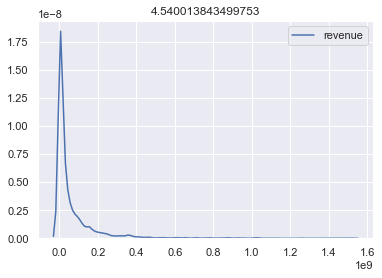

In [123]:
plt.title(skew(data.iloc[:len(train)]['revenue']))
sns.kdeplot(data.iloc[:len(train)]['revenue']);

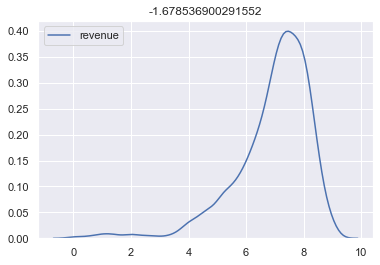

In [125]:
plt.title(skew(np.log10(data.iloc[:len(train)]['revenue'])))
sns.kdeplot(np.log10(data.iloc[:len(train)]['revenue']));

In [126]:
data['revenue'] = np.log(data['revenue'])

## Languagues

In [127]:
data['original_language'] = data['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else '0'))

## Model

In [128]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,Keywords,cast,crew,revenue,week_day,year,month
0,1,1,16.454568,2,0,1,2.024905,3,1,4.543295,1,4,24,72,16.326300,4,"(2010, 2020]",2
1,2,1,17.504390,4,0,1,2.224504,1,1,4.736198,1,4,20,9,18.370959,4,"(2000, 2010]",8
2,3,0,15.009433,2,1,1,4.178992,3,1,4.663439,1,12,51,64,16.387512,4,"(2010, 2020]",10
3,4,0,13.997833,2,1,0,1.429099,0,1,4.812184,2,7,7,3,16.588099,4,"(2010, 2020]",3
4,5,0,15.830414,2,0,0,0.764570,0,1,4.779123,1,0,4,2,15.182614,3,"(2000, 2010]",2


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 0 to 4397
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     7398 non-null   int64   
 1   belongs_to_collection  7398 non-null   int64   
 2   budget                 7398 non-null   float64 
 3   genres                 7398 non-null   int64   
 4   homepage               7398 non-null   int64   
 5   original_language      7398 non-null   object  
 6   popularity             7398 non-null   float64 
 7   production_companies   7398 non-null   int64   
 8   production_countries   7398 non-null   int64   
 9   runtime                7398 non-null   float64 
 10  spoken_languages       7398 non-null   int64   
 11  Keywords               7398 non-null   int64   
 12  cast                   7398 non-null   int64   
 13  crew                   7398 non-null   int64   
 14  revenue                3000 non-null   f

In [130]:
data_dummie = pd.get_dummies(data)
data_dummie.head()

,id,belongs_to_collection,budget,genres,homepage,popularity,production_companies,production_countries,runtime,spoken_languages,Keywords,cast,crew,revenue,original_language_1,original_language_2,original_language_0,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,"year_(1900, 1910]","year_(1910, 1930]","year_(1930, 1950]","year_(1950, 1960]","year_(1960, 1970]","year_(1970, 1980]","year_(1980, 1990]","year_(1990, 2000]","year_(2000, 2010]","year_(2010, 2020]",month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1,1,16.454568,2,0,2.024905,3,1,4.543295,1,4,24,72,16.326300,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2,1,17.504390,4,0,2.224504,1,1,4.736198,1,4,20,9,18.370959,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,0,15.009433,2,1,4.178992,3,1,4.663439,1,12,51,64,16.387512,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,4,0,13.997833,2,1,1.429099,0,1,4.812184,2,7,7,3,16.588099,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0,15.830414,2,0,0.764570,0,1,4.779123,1,0,4,2,15.182614,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [131]:
train_set = data_dummie.iloc[:len(train)].drop('id',axis=1)
test_set = data_dummie.iloc[len(train):].drop('revenue', axis=1)

In [132]:
x = train_set.drop('revenue', axis=1).values
y = train_set['revenue'].values

rb = RobustScaler()
x = rb.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [133]:
lasso = LassoCV(alphas=[1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]).fit(x_train, y_train)
elast = ElasticNetCV(alphas=[1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]).fit(x_train, y_train)

In [144]:
np.sqrt(mean_squared_error(y_test, lasso.predict(x_test)))

2.3989087641278948

In [146]:
np.sqrt(mean_squared_error(y_test, elast.predict(x_test)))

2.398737498068908